<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab2_Mapping/blob/main/Lab2_Mapping_Electric_Potential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2. Mapping Electric Potential

[Manual .pdf](https://github.com/evgeny-kolonsky/Lab2_Mapping/blob/main/%D7%AA%D7%93%D7%A8%D7%99%D7%9A%20%D7%9E%D7%99%D7%A4%D7%95%D7%99%20%D7%A4%D7%95%D7%98%D7%A0%D7%A6%D7%99%D7%90%D7%9C%20%D7%97%D7%A9%D7%9E%D7%9C%D7%99%205-3-23%20.pdf)  

Evgeny Kolonsky, Feb 2023

## Setup
1. Mapping Exlectric Potential experiment kit:
  - Cork board
  - Conductive paper x5
  - Silver ink pen
  - non-conductive pins x4
  - conductive pins x4
  - pensil x1
  - touche pens x2
  - trafaret
  - crocodiles black x3
  - crocodiles red x3
  - Probe-banana x1
2. Wires (from the Component board kit):
  - banana red x1
  - banana black x1
3. Measurement equipment:
  - DMM Keysight
4. Powers source TENMA

Notes:
  1. DMM should be in quick reaction mode for better data collection experience.


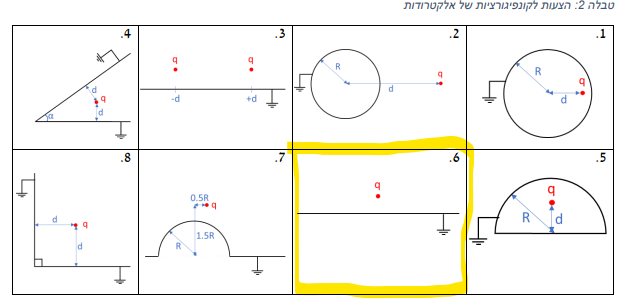

Experiments performed as on option 6.

In [1]:
import numpy as np # math functions
import scipy # scientific functions
import matplotlib.pyplot as plt # for plotting figures and setting their properties
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd # handling data structures (loaded from files)
from scipy.stats import linregress # contains linregress (for linear regression)
from scipy.optimize import curve_fit as cfit # non-linear curve fitting
from sklearn.metrics import r2_score # import function that calculates R^2 score




## First approach. Brute force. $V$ = 5V, $d$ = 10cm over ground line.

Brute force measurements of each point potential in right quadrant 10cm x 10cm:
(Time-consuming and brute approach).


In [2]:
measurements = '''
4.96 1.70 1.50 1.35 1.24 1.16 1.09 1.04 0.99 0.94 0.93
1.59 1.46 1.37 1.25 1.17 1.08 1.02 0.98 0.94 0.89 0.86
1.36 1.26 1.22 1.13 1.07 1.01 0.96 0.92 0.87 0.83 0.81
1.17 1.15 1.09 1.04 0.98 0.93 0.89 0.85 0.81 0.77 0.76
1.05 1.01 0.97 0.92 0.88 0.83 0.79 0.78 0.74 0.72 0.69
0.89 0.90 0.83 0.82 0.81 0.76 0.75 0.72 0.68 0.65 0.61
0.73 0.73 0.75 0.73 0.71 0.69 0.65 0.63 0.61 0.60 0.59
0.61 0.61 0.61 0.61 0.58 0.59 0.59 0.57 0.52 0.52 0.50
0.52 0.53 0.50 0.53 0.51 0.53 0.50 0.46 0.45 0.42 0.39
0.40 0.41 0.43 0.43 0.45 0.46 0.44 0.41 0.37 0.32 0.26
0.00 0.24 0.31 0.35 0.37 0.38 0.36 0.36 0.31 0.27 0.00
'''
x = np.linspace(0, 10, 11)
y = np.linspace(10, 0, 11)
X, Y = np.meshgrid(x, y)

Z = np.genfromtxt(measurements.splitlines(),dtype=float)


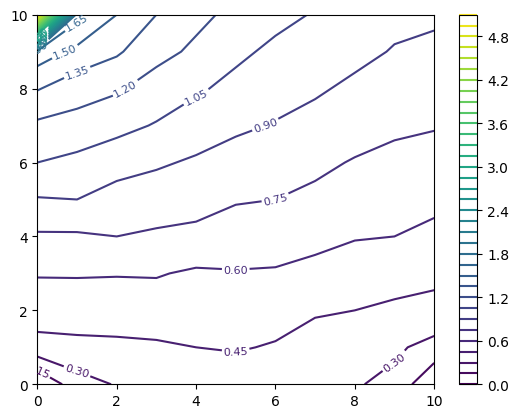

In [3]:
contours = plt.contour(X, Y, Z, 40)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar();


The ground line is not accurate zero due to improper quality of silver ink connection. Put more ink, let it dry, check conductivity!

## Second approach. $V$=20V, $d$ = 10cm.

Precced now as recommened in the [Experiment Manual](https://moodle2222.technion.ac.il/mod/resource/view.php?id=1119325).





Tip: the digital multimetr Keysight DMM 34450A **response time** by default is about 0.5s. The response time should be decreased by pressing **left arrow** on the front panel for better data collection expereince.

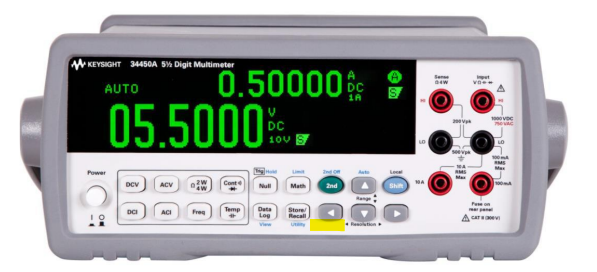

### Analytical solution

<Figure size 640x480 with 0 Axes>

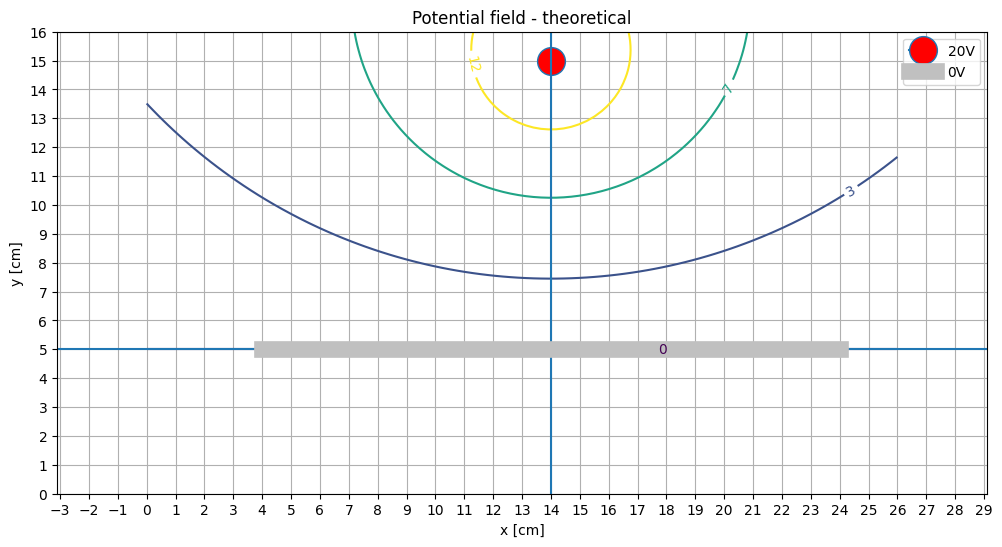

In [4]:
# Gil


#%% potential
#2:
x0 = 14 #cm
y0 = 5 #cm
Lx = 26 #cm
a = 10 #cm
Ly = 16
N = 100
Vmax = 20 #V
#C = Vmax/2/np.log(2*a)
C = 6
x_space = np.linspace(0, Lx , N) # defines coordinates
y_space = np.linspace(0, Ly , N) # defines coordinates
coord_x, coord_y = np.meshgrid(x_space, y_space)

# 4:
def potential(x, y, a, C):
    dx = x-x0
    dy = y-y0
    r = np.sqrt((dy - a)**2 + dx**2)
    rmirror = np.sqrt((dy + a)**2 + dx**2)
    V = -C * np.log(r/rmirror)
    return V

#5,6:
V_xy = potential(coord_x, coord_y, a, C) # calculates potential at givven coordinates (coord_x, coord_y) using parameters a and C

plt.figure() # opens a figure to plot
fig, ax = plt.subplots(figsize=(12,6))
#plt.pcolormesh(coord_x, coord_y, V_xy) # plot the 2D potential at the coordinates, where the value is displayd as a color.
#plt.colorbar() # adds a colorbar that indicate what is the value of any color

V_xy = potential(coord_x, coord_y, a, C) # calculates potential at given coordinates (coord_x, coord_y) using parameters a and C

contours =  plt.contour(coord_x, coord_y, V_xy, [0, 3, 7, 12]) # cmap picks the color palate - in this case yellow and red color gradients.
plt.clabel(contours, inline=True)


plt.xlabel('x [cm]')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.ylabel('y [cm]')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))

# +charge
plt.plot(x0, y0+a, marker="o", markersize=20, markerfacecolor="red", label='20V')

ax.grid()
ax.axhline(y0)
ax.axvline(x0)

plt.plot([x0-10, x0+10], [y0,y0], linewidth=12, color='silver', label='0V')
plt.axis('equal')
plt.title('Potential field - theoretical')
plt.legend()
plt.show() # displays the figure


### Experiment result


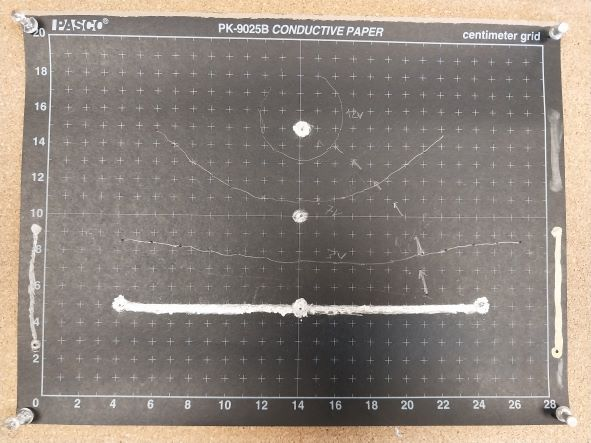

### 1-D measurement and analytical solution comparison

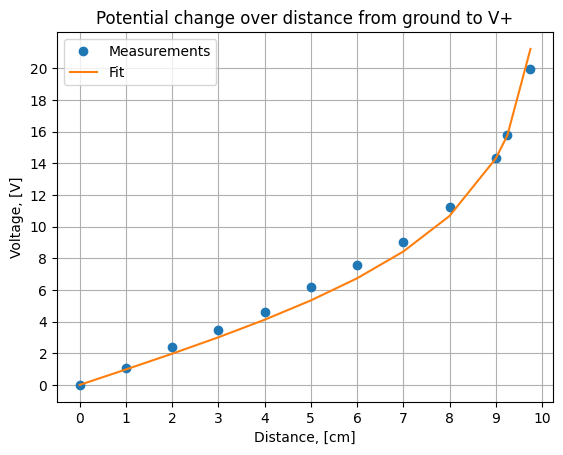

In [10]:
meas = '''
0 0
1 1.06
2 2.40
3 3.47
4 4.61
5 6.21
6 7.59
7 9.03
8 11.23
9 14.32
9.25 15.78
9.75 19.98
'''
data = np.genfromtxt(meas.splitlines())
ydata,vdata = data.T
#ydata = ydata + y0
# x - cm
plt.plot(ydata,vdata,'o', label='Measurements')
plt.title('Potential change over distance from ground to V+')
plt.grid()
plt.xlabel('Distance, [cm]')
plt.ylabel('Voltage, [V]')

def V_y(y, C):
  return potential(x0,y+y0, a, C)

popt, _ = cfit(V_y, ydata, vdata)
C = popt[0]
plt.plot(ydata, V_y(ydata,C), label='Fit')
plt.xticks(range(0,11,1))
plt.yticks(range(0,21,2))
plt.legend()

### The same but With magnet clips, not using silver ink pen

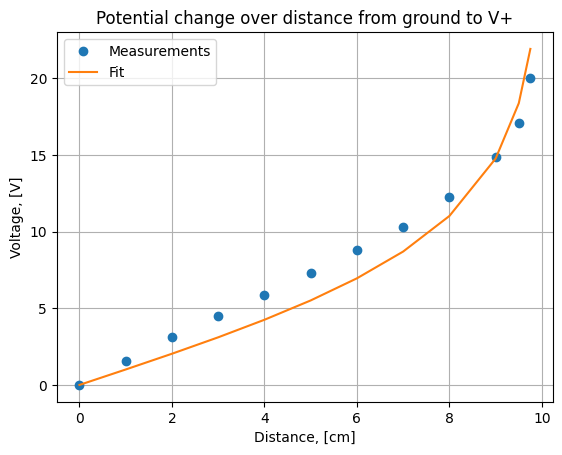

In [6]:
meas = '''
0 0
1 1.53
2 3.12
3 4.52
4 5.84
5 7.30
6 8.83
7 10.31
8 12.28
9 14.83
9.5 17.09
9.75 19.98
'''
data = np.genfromtxt(meas.splitlines())
ydata,vdata = data.T
#ydata = ydata + y0
# x - cm
plt.plot(ydata,vdata,'o', label='Measurements')
plt.title('Potential change over distance from ground to V+')
plt.grid()
plt.xlabel('Distance, [cm]')
plt.ylabel('Voltage, [V]')

def V_y(y, C):
  return potential(x0,y+y0, a, C)

popt, _ = cfit(V_y, ydata, vdata)
C = popt[0]
plt.plot(ydata, V_y(ydata,C), label='Fit')
plt.legend()